In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [ ]:
data=pd.read_csv("/ElecDeviceRatingPrediction.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/ElecDeviceRatingPrediction.csv'

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
sum(data.duplicated())==0

True

In [ ]:
print(data.isnull().sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
'''from sklearn.impute import SimpleImputer
# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include='number').columns
categorical_cols = data.select_dtypes(include='object').columns

# Create imputers for numerical and categorical columns
numerical_imputer = SimpleImputer(strategy='most_frequent')
categorical_imputer = SimpleImputer(strategy='most_frequent')
# Apply imputation to numerical columns
data[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])

# Apply imputation to categorical columns
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])'''

"from sklearn.impute import SimpleImputer\n# Separate numerical and categorical columns\nnumerical_cols = data.select_dtypes(include='number').columns\ncategorical_cols = data.select_dtypes(include='object').columns\n\n# Create imputers for numerical and categorical columns\nnumerical_imputer = SimpleImputer(strategy='most_frequent')\ncategorical_imputer = SimpleImputer(strategy='most_frequent')\n# Apply imputation to numerical columns\ndata[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])\n\n# Apply imputation to categorical columns\ndata[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])"

In [ ]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])

In [ ]:
data['Married']=data['Married'].fillna(data['Married'].mode()[0])

In [ ]:
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])

In [ ]:
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [ ]:
data.dropna(subset=['LoanAmount'], inplace=True)

In [ ]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

In [ ]:
data.dropna(subset=['Credit_History'], inplace=True)

In [ ]:
print(data.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            543 non-null    object 
 1   Gender             543 non-null    object 
 2   Married            543 non-null    object 
 3   Dependents         543 non-null    object 
 4   Education          543 non-null    object 
 5   Self_Employed      543 non-null    object 
 6   ApplicantIncome    543 non-null    int64  
 7   CoapplicantIncome  543 non-null    float64
 8   LoanAmount         543 non-null    float64
 9   Loan_Amount_Term   543 non-null    float64
 10  Credit_History     543 non-null    float64
 11  Property_Area      543 non-null    object 
 12  Loan_Status        543 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 59.4+ KB


In [ ]:
data=pd.get_dummies(data,columns=['Gender'] )
data=pd.get_dummies(data,columns=['Married'] )
data=pd.get_dummies(data,columns=['Dependents'] )
data=pd.get_dummies(data,columns=['Education'] )
data=pd.get_dummies(data,columns=['Self_Employed'] )
data=pd.get_dummies(data,columns=['Property_Area'] )
data=pd.get_dummies(data,columns=['Loan_Status'] )

In [ ]:
'''from sklearn.preprocessing import OneHotEncoder

data['Married']=data['Married'].astype('category')
data['Self_Employed']=data['Self_Employed'].astype('category')
data['Education']=data['Education'].astype('category')
data['Property_Area']=data['Property_Area'].astype('category')
data['Dependents']=data['Dependents'].astype('category')


data['Married_numeric']=data['Married'].cat.codes
data['Self_Employed_numeric']=data['Self_Employed'].cat.codes
data['Education_numeric']=data['Education'].cat.codes
data['Property_Area_numeric']=data['Property_Area'].cat.codes
data['Dependents_numeric']=data['Dependents'].cat.codes

enc= OneHotEncoder()
enc_data= pd.DataFrame(enc.fit_transform(data[['Married_numeric','Self_Employed_numeric','Education_numeric','Property_Area_numeric','Dependents_numeric']]).toarray())'''



"from sklearn.preprocessing import OneHotEncoder\n\ndata['Married']=data['Married'].astype('category')\ndata['Self_Employed']=data['Self_Employed'].astype('category')\ndata['Education']=data['Education'].astype('category')\ndata['Property_Area']=data['Property_Area'].astype('category')\ndata['Dependents']=data['Dependents'].astype('category')\n\n\ndata['Married_numeric']=data['Married'].cat.codes\ndata['Self_Employed_numeric']=data['Self_Employed'].cat.codes\ndata['Education_numeric']=data['Education'].cat.codes\ndata['Property_Area_numeric']=data['Property_Area'].cat.codes\ndata['Dependents_numeric']=data['Dependents'].cat.codes\n\nenc= OneHotEncoder()\nenc_data= pd.DataFrame(enc.fit_transform(data[['Married_numeric','Self_Employed_numeric','Education_numeric','Property_Area_numeric','Dependents_numeric']]).toarray())"

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 1 to 613
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  543 non-null    object 
 1   ApplicantIncome          543 non-null    int64  
 2   CoapplicantIncome        543 non-null    float64
 3   LoanAmount               543 non-null    float64
 4   Loan_Amount_Term         543 non-null    float64
 5   Credit_History           543 non-null    float64
 6   Gender_Female            543 non-null    uint8  
 7   Gender_Male              543 non-null    uint8  
 8   Married_No               543 non-null    uint8  
 9   Married_Yes              543 non-null    uint8  
 10  Dependents_0             543 non-null    uint8  
 11  Dependents_1             543 non-null    uint8  
 12  Dependents_2             543 non-null    uint8  
 13  Dependents_3+            543 non-null    uint8  
 14  Education_Graduate       5

In [ ]:
data= data.drop(['Loan_ID'],axis=1)

In [ ]:
data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D object at 0x7f580733f850>, <matplotlib.lines.Line2D object at 0x7f580733f1f0>, <matplotlib.lines.Line2D object at 0x7f5804f6f250>, <matplotlib.lines.Line2D object at 0x7f5804f6ee60>, <matplotlib.lines.Line2D object at 0x7f5804f6d0f0>, <matplotlib.lines.Line2D object at 0x7f5804f6fb50>], 'caps': [<matplotlib.lines.Line2D object at 0x7f580733ea10>, <matplotlib.lines.Line2D object at 0x7f580733ffa0>, <matplotlib.lines.Line2D object at 0x7f5804f6d4e0>, <matplotlib.lines.Line2D object at 0x7f5804f6e1a0>, <matplotlib.lines.Line2D object at 0x7f5804f6d600>, <matplotlib.lines.Line2D object at 0x7f5804f6c580>], 'boxes': [<matplotlib.patches.PathPatch object at 0x7f580733d450>, <matplotlib.patches.PathPatch object at 0x7f5804f6e6e0>, <matplotlib.patches.PathPatch object at 0x7f5804f6c0d0>], 'medians': [<matplotlib.lines.Line2D object at 0x7f580733d480>, <matplotlib.lines.Line2D object at 0x7f5804f6ffa0>, <matplotlib.lines.Line2D object at 0x7f5804f6fa30>], 

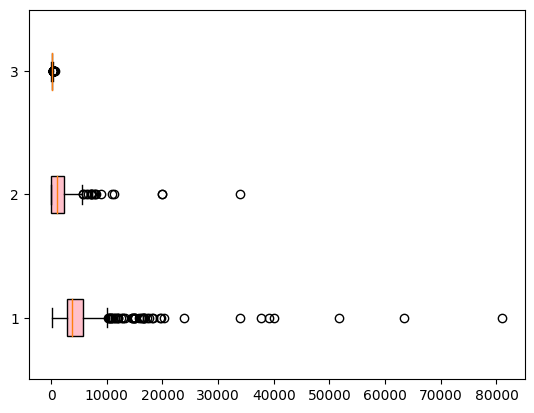

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()

# Draw the  boxplot
print(ax.boxplot(data[['ApplicantIncome','CoapplicantIncome','LoanAmount']], vert=False, patch_artist=True, boxprops=dict(facecolor='pink')))

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,...,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,5472.331492,1547.268729,145.088398,342.806630,0.843462,0.180479,0.819521,0.355433,0.644567,0.587477,...,0.084715,0.790055,0.209945,0.867403,0.132597,0.292818,0.390424,0.316759,0.311234,0.688766
std,6330.726832,2504.696507,83.309428,64.079671,0.363699,0.384940,0.384940,0.479086,0.479086,0.492742,...,0.278713,0.407644,0.407644,0.339451,0.339451,0.455475,0.488295,0.465641,0.463425,0.463425
min,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2897.500000,0.000000,100.000000,360.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3814.000000,1126.000000,127.000000,360.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5790.000000,2251.500000,165.500000,360.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
MAX_ApplicantIncome=5790.000000 + (1.5 * (5790.000000-5790.000000))
MIN_ApplicantIncome=150.000000- (1.5 * (5790.000000-5790.000000))
for x in data.index:
 if data.loc[x,"ApplicantIncome"] > MAX_ApplicantIncome:
   data.loc[x,"ApplicantIncome"] = MAX_ApplicantIncome
 elif data.loc[x,"ApplicantIncome"] < MIN_ApplicantIncome:
    data.loc[x,"ApplicantIncome"] = MIN_ApplicantIncome


In [ ]:
MAX_CoapplicantIncome=2251.500000+ (1.5 * (2251.500000-0.000000))
MIN_CoapplicantIncome=0.000000- (1.5 * (2251.500000-0.000000))
for x in data.index:
 if data.loc[x,"CoapplicantIncome"] > MAX_CoapplicantIncome:
   data.loc[x,"CoapplicantIncome"] = MAX_CoapplicantIncome
 elif data.loc[x,"CoapplicantIncome"] < MIN_CoapplicantIncome:
    data.loc[x,"CoapplicantIncome"] = MIN_CoapplicantIncome


In [ ]:
MAX_LoanAmount=165.500000+ (1.5 * (165.500000-100.000000))
MIN_LoanAmount=100.000000	- (1.5 * (165.500000-100.000000))
for x in data.index:
 if data.loc[x,"LoanAmount"] > MAX_LoanAmount:
   data.loc[x,"LoanAmount"] = MAX_LoanAmount
 elif data.loc[x,"LoanAmount"] < MIN_LoanAmount:
    data.loc[x,"LoanAmount"] = MIN_LoanAmount


In [ ]:
'''MAX_Loan_Amount_Term	=360.000000	+ (1.5 * (360.000000-360.000000	))
MIN_Loan_Amount_Term=360.000000	- (1.5 * (360.000000-360.000000	))
for x in data.index:
 if data.loc[x,"Loan_Amount_Term"] > MAX_Loan_Amount_Term	:
   data.loc[x,"Loan_Amount_Term"] = MAX_Loan_Amount_Term
 elif data.loc[x,"Loan_Amount_Term"] < MIN_Loan_Amount_Term:
    data.loc[x,"Loan_Amount_Term"] = MIN_Loan_Amount_Term'''

'MAX_Loan_Amount_Term\t=360.000000\t+ (1.5 * (360.000000-360.000000\t))\nMIN_Loan_Amount_Term=360.000000\t- (1.5 * (360.000000-360.000000\t))\nfor x in data.index:\n if data.loc[x,"Loan_Amount_Term"] > MAX_Loan_Amount_Term\t:\n   data.loc[x,"Loan_Amount_Term"] = MAX_Loan_Amount_Term\t\n elif data.loc[x,"Loan_Amount_Term"] < MIN_Loan_Amount_Term:\n    data.loc[x,"Loan_Amount_Term"] = MIN_Loan_Amount_Term'

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,...,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,4004.416206,1388.662376,137.167587,342.806630,0.843462,0.180479,0.819521,0.355433,0.644567,0.587477,...,0.084715,0.790055,0.209945,0.867403,0.132597,0.292818,0.390424,0.316759,0.311234,0.688766
std,1393.443576,1593.393928,56.722491,64.079671,0.363699,0.384940,0.384940,0.479086,0.479086,0.492742,...,0.278713,0.407644,0.407644,0.339451,0.339451,0.455475,0.488295,0.465641,0.463425,0.463425
min,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2897.500000,0.000000,100.000000,360.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3814.000000,1126.000000,127.000000,360.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5785.000000,2251.500000,165.500000,360.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5790.000000,5628.750000,263.750000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D object at 0x7f580795edd0>, <matplotlib.lines.Line2D object at 0x7f580795cca0>, <matplotlib.lines.Line2D object at 0x7f580740c100>, <matplotlib.lines.Line2D object at 0x7f580740ea10>, <matplotlib.lines.Line2D object at 0x7f5804ebfaf0>, <matplotlib.lines.Line2D object at 0x7f5804ebf7c0>], 'caps': [<matplotlib.lines.Line2D object at 0x7f580795ec20>, <matplotlib.lines.Line2D object at 0x7f580795f190>, <matplotlib.lines.Line2D object at 0x7f5804f99f00>, <matplotlib.lines.Line2D object at 0x7f5804ebd3f0>, <matplotlib.lines.Line2D object at 0x7f5804ebcc70>, <matplotlib.lines.Line2D object at 0x7f5804ebe350>], 'boxes': [<matplotlib.patches.PathPatch object at 0x7f580795d3c0>, <matplotlib.patches.PathPatch object at 0x7f580795f160>, <matplotlib.patches.PathPatch object at 0x7f5804ebdea0>], 'medians': [<matplotlib.lines.Line2D object at 0x7f580795e9e0>, <matplotlib.lines.Line2D object at 0x7f5804ebe530>, <matplotlib.lines.Line2D object at 0x7f5804ebcd30>], 

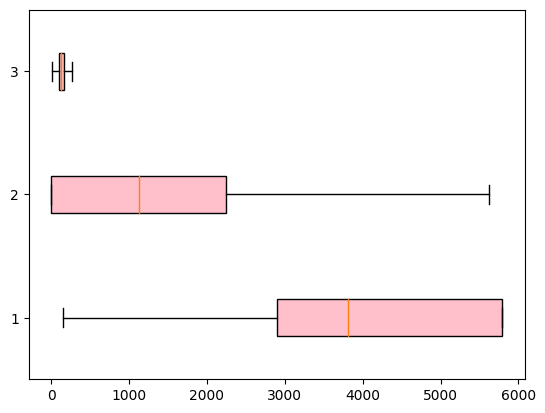

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()

# Draw the horizontal boxplot with color
print(ax.boxplot(data[['ApplicantIncome','CoapplicantIncome','LoanAmount' ]], vert=False, patch_artist=True, boxprops=dict(facecolor='pink')))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#to take an object from class MinMaxScaler
scaler = MinMaxScaler()
#this code normalizes values in dataframe , but it returns an array
normalized_data = scaler.fit_transform(data)
#converting array to dataframe
data = pd.DataFrame(normalized_data, columns=data.columns )
#now we have df as a normalized data frame with all values in range [0,1]


In [ ]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0.785993,0.267910,0.467125,0.72973,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.505319,0.000000,0.223749,0.72973,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.431383,0.418921,0.435721,0.72973,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.000000,0.000000,0.518155,0.72973,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.933865,0.745459,1.000000,0.72973,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


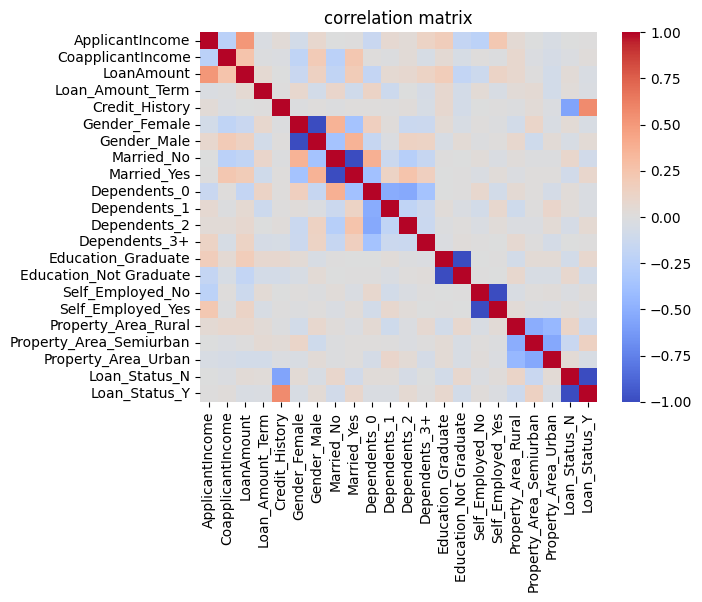

In [ ]:
corr_matrix = data.corr()

sns.heatmap(corr_matrix ,annot=False , cmap='coolwarm', vmin=-1 , vmax=1)
plt.title('correlation matrix')
plt.show()

In [ ]:
corr_matrix = data.corr(method='pearson')[['Loan_Status_Y']]
print(corr_matrix)

                         Loan_Status_Y
CoapplicantIncome             0.019558
LoanAmount                   -0.033282
Loan_Amount_Term             -0.029927
Credit_History                0.564243
Gender_Female                -0.046532
Married_Yes                   0.090845
Dependents_1                 -0.024337
Dependents_2                  0.059734
Dependents_3+                 0.004525
Education_Graduate            0.083204
Property_Area_Rural          -0.109382
Property_Area_Semiurban       0.146611
Property_Area_Urban          -0.046750
Loan_Status_Y                 1.000000


In [ ]:
data= data.drop(['ApplicantIncome'],axis=1)
data= data.drop(['Dependents_0'],axis=1)
data= data.drop(['Self_Employed_Yes'],axis=1)

In [ ]:
data= data.drop(['Gender_Male'],axis=1)
data= data.drop(['Education_Not Graduate'],axis=1)
data= data.drop(['Loan_Status_N'],axis=1)
data=data.drop(['Self_Employed_No'],axis=1)
data=data.drop(['Married_No'],axis=1)

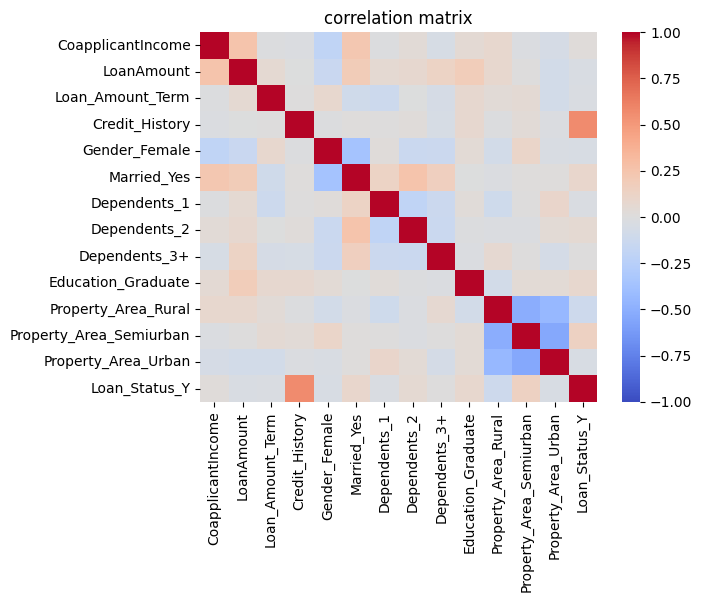

In [ ]:
corr_matrix = data.corr()

sns.heatmap(corr_matrix ,annot=False , cmap='coolwarm', vmin=-1 , vmax=1)
plt.title('correlation matrix')
plt.show()

In [ ]:

'''from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Separate the feature variables (X) and the target variable (y)
X = data.drop('Loan_Status_Y', axis=1)
y = data['Loan_Status_Y']

# Apply SelectKBest class to find the best features
best_features = SelectKBest(score_func=chi2)
fit = best_features.fit(X, y)

# Print the scores for each feature
scores = pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_})
print(scores)

# Get the k best features
top_features = X.columns[fit.get_support(indices=True)]
print(top_features)'''

                    Feature      Score
0         CoapplicantIncome   0.067344
1                LoanAmount   0.059160
2          Loan_Amount_Term   0.014632
3            Credit_History  27.061445
4             Gender_Female   0.963524
5               Married_Yes   1.592801
6              Dependents_1   0.270685
7              Dependents_2   1.609210
8             Dependents_3+   0.010175
9        Education_Graduate   0.789216
10      Property_Area_Rural   4.594344
11  Property_Area_Semiurban   7.114778
12      Property_Area_Urban   0.810837
Index(['CoapplicantIncome', 'Credit_History', 'Gender_Female', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


In [ ]:
'''from sklearn.feature_selection import mutual_info_classif

# Separate the feature variables (X) and the target variable (y)
X = data.drop('Loan_Status_Y', axis=1)
y = data['Loan_Status_Y']

# Calculate the information gain for each feature
information_gains = mutual_info_classif(X, y)

# Print the information gain values for each feature
for feature, gain in zip(X.columns, information_gains):
    print(f"Information gain of {feature}: {gain}")'''


Information gain of CoapplicantIncome: 0.0
Information gain of LoanAmount: 0.0
Information gain of Loan_Amount_Term: 0.0
Information gain of Credit_History: 0.13752074751922327
Information gain of Gender_Female: 0.0
Information gain of Married_Yes: 0.0
Information gain of Dependents_1: 0.0
Information gain of Dependents_2: 0.019525039700376556
Information gain of Dependents_3+: 0.0
Information gain of Education_Graduate: 0.0
Information gain of Property_Area_Rural: 0.01505259053769259
Information gain of Property_Area_Semiurban: 0.030158591196960627
Information gain of Property_Area_Urban: 0.0


Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Split the dataset into features and target variable
X = data.drop("Loan_Status_Y", axis=1)
y = data["Loan_Status_Y"]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

# Calculate acuuracy
accuracy = accuracy_score(y_test, y_pred)
print (f"Logistic regression accuracy : {accuracy}")






Logistic regression accuracy : 0.8440366972477065


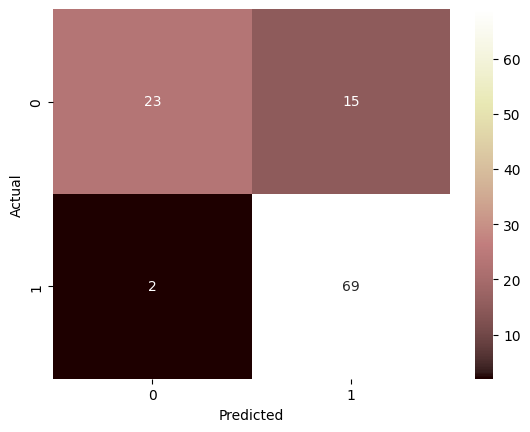

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='pink')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

         0.0       0.92      0.61      0.73        38
         1.0       0.82      0.97      0.89        71

    accuracy                           0.84       109
   macro avg       0.87      0.79      0.81       109
weighted avg       0.86      0.84      0.83       109



In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"logistic regrisson error : {mse}" )

logistic regrisson error : 0.1559633027522936


Svm

In [ ]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC()

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"svm accuracy :{accuracy}")



svm accuracy :0.8440366972477065


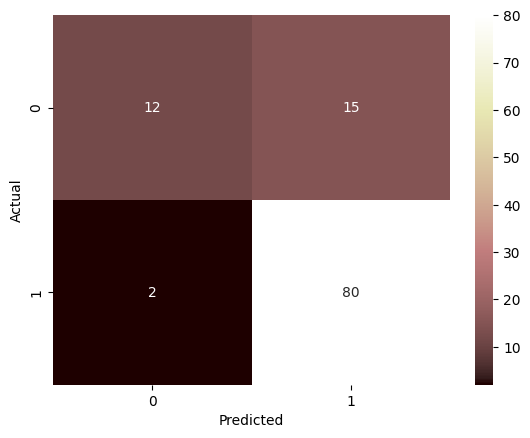

In [ ]:
cm = confusion_matrix(y_test, y_pred)


# Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='pink')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"svm error :{mse}")


svm error :0.13479387177321364


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

decision_tree = DecisionTreeClassifier( max_depth= 1 )

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print (f"Decition tree accurac:{accuracy}")

Decition tree accurac:0.8256880733944955


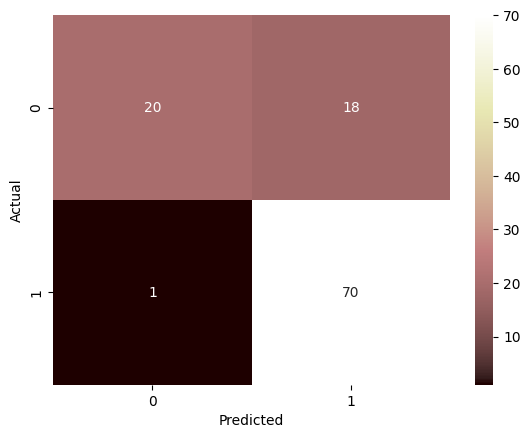

In [ ]:
cm = confusion_matrix(y_test, y_pred)


# Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='pink')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Dicision tree error : {mse}")

Dicision tree error : 0.14302669806649576


Random forset


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"random forset :{accuracy}")

random forset :0.8440366972477065


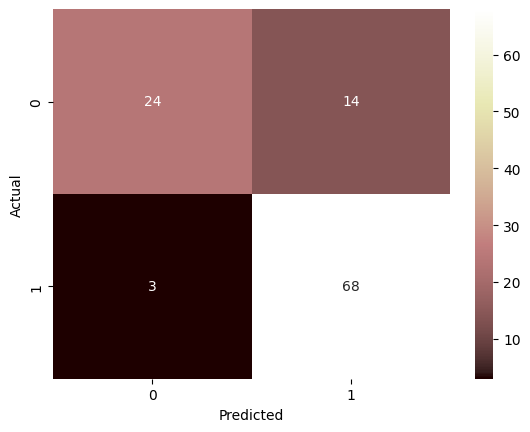

In [ ]:
cm = confusion_matrix(y_test, y_pred)


# Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='pink')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1559633027522936
